<a href="https://colab.research.google.com/github/djglab/Foxk1_manuscript/blob/main/notebooks/Supplementary_4cd_Foxk1_RNA_ATAC_Integration_chromVAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to evaluate the pathways upregulated in genes commonly upregulated between RNA and ATAC data to see TFs highlighted from chromVar.

In [ ]:
start_time0 <- Sys.time()

#**Install external packages**

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

#**Downloading and loading packages required for the analysis**

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'gplots', 'circlize', 'plyr', 'dplyr',  'ggrepel', 'splitstackshape',  'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'ggplot2',
  'GO.db','ReactomePA', 'ggnewscale', 'pathview', 'gage', 'gageData'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/ComplexHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr' 'ggplot2'”
Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'gplots', 'circlize', 'plyr',
  'ggrepel', 'splitstackshape', 'BiocParallel', 'SummarizedExperiment',
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'apeglm', '

crayon (1.5.0 -> 1.5.1) [CRAN]
fansi  (1.0.2 -> 1.0.3) [CRAN]
tzdb   (0.2.0 -> 0.3.0) [CRAN]


Installing 3 packages: crayon, fansi, tzdb

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpSp8ZHD/remotes3d61732da7/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators  (NA -> 1.0.14) [CRAN]
foreach    (NA -> 1.5.2 ) [CRAN]
doParallel (NA -> 1.0.17) [CRAN]
clue       (NA -> 0.3-60) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpSp8ZHD/remotes3d5d24b6bb/jokergoo-ComplexHeatmap-22ab8e0/DESCRIPTION’ ... OK
* preparing ‘ComplexHeatmap’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ComplexHeatmap_2.11.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]


Installing 2 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpSp8ZHD/remotes3d3dd2f070/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpSp8ZHD/remotes3d4fd40e7c/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(GenomicRanges)
library(ggrepel)
library(splitstackshape)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(apeglm)
library(biomaRt)
library(org.Mm.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(ggplot2)
library(tidyr)
library(Matrix)
library(GO.db)
library(matrixStats)
library(ComplexHeatmap)
library(stringr)
library(DOSE)
library(ReactomePA)
library(ggnewscale)
library(GOSemSim)
library(enrichplot)
library(pathview)
library(gage)
library(gageData)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)

#**Generate a Granges dataset 'gr' using the bed files for chromVar analysis**

In [ ]:
s3_bed_files <- c(
  'FoxK1_KO_D3-1_S1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-1_S1.dedup_summits.bed',
  'FoxK1_KO_D3-2_S2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-2_S2.dedup_summits.bed',
  'FoxK1_KO_D5-1_S3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D5-1_S3.dedup_summits.bed',
  'FoxK1_KO_D5-2_S4' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D5-2_S4.dedup_summits.bed',
  'FoxK1_KO_D7-1_S5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-1_S5.dedup_summits.bed',
  'FoxK1_KO_D7-2_S6' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-2_S6.dedup_summits.bed',
  'iFoxk1_Dox_D3-1_S13' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D3-1_S13.dedup_summits.bed',
  'iFoxk1_Dox_D3-2_S14' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D3-2_S14.dedup_summits.bed',
  'iFoxk1_Dox_D5-1_S15' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D5-1_S15.dedup_summits.bed',
  'iFoxk1_Dox_D5-2_S16' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D5-2_S16.dedup_summits.bed',
  'iFoxk1_Dox_D7-1_S17' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D7-1_S17.dedup_summits.bed',
  'iFoxk1_Dox_D7-2_S18' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_Dox_D7-2_S18.dedup_summits.bed',
  'iFoxk1_ND_D3-1_S7' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-1_S7.dedup_summits.bed',
  'iFoxk1_ND_D3-2_S8' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-2_S8.dedup_summits.bed',
  'iFoxk1_ND_D5-1_S9' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-1_S9.dedup_summits.bed',
  'iFoxk1_ND_D5-2_S10' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-2_S10.dedup_summits.bed',
  'iFoxk1_ND_D7-1_S11' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D7-1_S11.dedup_summits.bed',
  'iFoxk1_ND_D7-2_S12' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D7-2_S12.dedup_summits.bed')


In [ ]:
peak_size <- 200L # the ATAC-seq peaks
window_size <- 800L
gr <- lapply(s3_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = peak_size)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 2, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(width = window_size, fix = 'center')
  gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [ ]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr

GRanges object with 94713 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]     chr1     3037558-3038357      *
      [2]     chr1     3062526-3063325      *
      [3]     chr1     3191360-3192159      *
      [4]     chr1     3253111-3253910      *
      [5]     chr1     3263498-3264297      *
      ...      ...                 ...    ...
  [94709]     chrX 170843428-170844227      *
  [94710]     chrX 170843538-170844337      *
  [94711]     chrX 170843706-170844505      *
  [94712]     chrX 170861798-170862597      *
  [94713]     chrX 170880730-170881529      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

#**Read pileup files and get read counts for chromVar analysis**

In [ ]:
s3_bw_files <- c('iFoxk1_ND_D3-1_S7' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-1_S7.dedup_treat_pileup.bw',
  'iFoxk1_ND_D3-2_S8' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D3-2_S8.dedup_treat_pileup.bw',
  'iFoxk1_ND_D5-1_S9' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-1_S9.dedup_treat_pileup.bw',
  'iFoxk1_ND_D5-2_S10' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/iFoxk1_ND_D5-2_S10.dedup_treat_pileup.bw',
  'FoxK1_KO_D3-1_S1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-1_S1.dedup_treat_pileup.bw',
  'FoxK1_KO_D3-2_S2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D3-2_S2.dedup_treat_pileup.bw',
  'FoxK1_KO_D5-1_S5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-1_S5.dedup_treat_pileup.bw',
  'FoxK1_KO_D5-2_S6' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/FoxK1_KO_D7-2_S6.dedup_treat_pileup.bw')

In [ ]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files))))

In [ ]:
library(rtracklayer)
library(futile.logger)
X <- do.call('cbind', lapply(s3_bw_files, function(bw_file){
  flog.info(sprintf('reading %s', bw_file))
	ga <- rtracklayer::import(bw_file, format = 'BigWig')#, which = reduce(peaks))	
  cvg <- coverage(ga, weight = as.numeric(mcols(ga)$score))
  sum(cvg[gr])
}))
se <- SummarizedExperiment(assays = SimpleList(counts = X), rowRanges = gr, colData = names(s3_bw_files))

In [ ]:
se <- addGCBias(se, genome = BSgenome.Mmusculus.UCSC.mm10)

In [ ]:
colnames(colData(se)) <- c("Name") ##Changing colData of sample names from 'X' to 'Name'

## **Adding colData information**

In [ ]:
colData(se)$ND <- grepl('ND', names(s3_bw_files))
colData(se)$KO <- grepl('KO', names(s3_bw_files))
colData(se)$Dox<- grepl('Dox', names(s3_bw_files))
colData(se)$D3 <- grepl('D3', names(s3_bw_files))
colData(se)$D5 <- grepl('D5', names(s3_bw_files))
colData(se)$D7 <- grepl('D7', names(s3_bw_files))

In [ ]:
colData(se)$condition <- t(apply(colData(se)[,c("ND","KO")], 1, function(i) names(colData(se)[,c("ND","KO")])[i]))
colData(se)$time <- t(apply(colData(se)[,c("D3","D5","D7")], 1, function(i) names(colData(se)[,c("D3","D5","D7")])[i]))

In [ ]:
colData(se)$Sample <- paste(colData(se)$condition, colData(se)$time, sep='_')

# **ChromVar analysis for WT vs KO**

In [ ]:
motif_ix <- matchMotifs(mouse_pwms_v2, se, genome = BSgenome.Mmusculus.UCSC.mm10)

In [ ]:
dev <- computeDeviations(object = se, annotations = motif_ix)
v <- computeVariability(dev)

In [ ]:
m <- v$p_value_adj < 0.05
cat(sprintf('# of significant motifs: %d(%d)\n', sum(m), length(m)))
Y <- assays(dev)$z
rownames(Y) <- rowData(dev)$name
Y <- Y[m, ]

### Named list for each condition and timepoint - ND_D3, KO_D3, ND_D5 and KO_D5

In [ ]:
nd_d3_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('iFoxk1_ND_D3-1_S7', 'iFoxk1_ND_D3-2_S8')])) 
ko_d3_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('FoxK1_KO_D3-1_S1', 'FoxK1_KO_D3-2_S2')]))

In [ ]:
nd_d5_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('iFoxk1_ND_D5-1_S9',	'iFoxk1_ND_D5-2_S10')]))
ko_d5_atac <- (rowMeans(assays(dev)$deviations[, colData(dev)$Name %in% c('FoxK1_KO_D5-1_S5',	'FoxK1_KO_D5-2_S6')]))

### Dataframe containing motif information from chromVar obatined using deviations assay data

In [ ]:
chrom_dat <- data.frame(
  gene_name = v$name,
  D3 = nd_d3_atac - ko_d3_atac,
  pvalue_adj = v$p_value_adj,
  D5 = nd_d5_atac - ko_d5_atac
) 

# RNASeq and DESeq2 

## Read counts files from preprocessed data

In [ ]:
txi_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Kallisto_reseq_txi_v1.rds'
txi <- txi_file %>%
  url() %>%
  gzcon() %>%
  readRDS()

In [ ]:
t2g_dat <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/transcripts_to_genes.txt', sep = '\t') ##Dataset containing transcripts informtion

In [ ]:
colnames(t2g_dat) <- c('ensembl_transcript', 'ensembl_gene', 'gene_name')
head(t2g_dat)

,ensembl_transcript,ensembl_gene,gene_name
,<chr>,<chr>,<chr>
1,ENSMUST00000193812.1,ENSMUSG00000102693.1,4933401J01Rik
2,ENSMUST00000082908.1,ENSMUSG00000064842.1,Gm26206
3,ENSMUST00000162897.1,ENSMUSG00000051951.5,Xkr4
4,ENSMUST00000159265.1,ENSMUSG00000051951.5,Xkr4
5,ENSMUST00000070533.4,ENSMUSG00000051951.5,Xkr4
6,ENSMUST00000192857.1,ENSMUSG00000102851.1,Gm18956


# Normalize the read counts by DESeq2

In [ ]:
condition <- gsub('1_|2_|_iHAFoxk1_EB|Foxk1|_EB|_iHAFoxk1_EB', '', colnames(txi$counts)) ##parsing text to get the day and condition to get 'D3_KO' 
sampleTable <- as.data.frame(condition)

In [ ]:
rownames(sampleTable) <- colnames(txi$counts)
head(sampleTable)

In [ ]:
set.seed(9821)
dds <- DESeqDataSetFromTximport(txi, sampleTable, ~condition)

In [ ]:
dds_res <- DESeq(dds)

In [ ]:
mat <- counts(dds_res)

In [ ]:
rownames(mat) <- t2g_dat$gene_name[match(rownames(mat), t2g_dat$ensembl_gene)]

# Upregulation and Downregulation of genes in WT and KO

## ND_D3 upregulated and Downregulated genes

In [ ]:
ND_d3 <- results(dds_res, contrast = c('condition', 'D3_ND', 'D3_KO'), alpha = 0.05) 

In [ ]:
ND_d3$gene_name <- t2g_dat$gene_name[match(rownames(ND_d3), t2g_dat$ensembl_gene)] 
ND_d3$transcriptId <- t2g_dat$ensembl_transcript[match(rownames(ND_d3), t2g_dat$ensembl_gene)] 

In [ ]:
up_d3 <- ND_d3[!is.na(ND_d3$padj) & ND_d3$padj<0.05 & ND_d3$log2FoldChange > 0,] ##Subsetting up regulated
down_d3 <- ND_d3[!is.na(ND_d3$padj) & ND_d3$padj<0.05 & ND_d3$log2FoldChange < 0,] ##Subsetting down regulated

In [ ]:
sig <- ND_d3[!is.na(ND_d3$padj) & ND_d3$padj<0.05 & abs(ND_d3$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

## ND_D5 upregulated and Downregulated genes

In [ ]:
ND_d5 <- results(dds_res, contrast = c('condition', 'D5_ND', 'D5_KO'), alpha = 0.05)

In [ ]:
ND_d5$gene_name <- t2g_dat$gene_name[match(rownames(ND_d5), t2g_dat$ensembl_gene)] 
ND_d5$transcriptId <- t2g_dat$ensembl_transcript[match(rownames(ND_d5), t2g_dat$ensembl_gene)] 

In [ ]:
up_d5 <- ND_d5[!is.na(ND_d5$padj) & ND_d5$padj<0.05 & ND_d5$log2FoldChange > 0,] ##Subsetting up regulated
down_d5 <- ND_d5[!is.na(ND_d5$padj) & ND_d5$padj<0.05 & ND_d5$log2FoldChange < 0,] ##Subsetting down regulated

In [ ]:
sig_d5 <- ND_d5[!is.na(ND_d5$padj) & ND_d5$padj<0.05 & abs(ND_d5$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

# RNA and ChromVar overlap of up regulated and downregulated genes WT(ND) and KO

## Combining RNA and ChromVar dataframes 

In [ ]:
dat_merge_d3 <- merge(as.data.frame(ND_d3), chrom_dat, by = 'gene_name') #Day 3 
dat_merge_d5 <- merge(as.data.frame(ND_d5), chrom_dat, by = 'gene_name') #Day 5

In [ ]:
dat_merge_d3 <- dat_merge_d3 %>% drop_na()
dat_merge_d5 <- dat_merge_d5 %>% drop_na()

In [ ]:
head(dat_merge_d3)
head(dat_merge_d5)

,gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,transcriptId,D3,pvalue_adj,D5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Ahctf1,2573.459245,-0.05216881,0.1068680,-0.4881613,6.254356e-01,8.058728e-01,ENSMUST00000027768.13,-0.01299484,2.054110e-12,-0.004180976
2,Ahr,103.067234,-1.76350317,0.3660428,-4.8177516,1.451850e-06,2.322019e-05,ENSMUST00000116436.8,-0.00148721,6.962567e-55,0.003594083
3,Ahrr,16.349822,-0.73971997,0.9828699,-0.7526123,4.516829e-01,6.755733e-01,ENSMUST00000022059.13,-0.00148721,6.962567e-55,0.003594083
4,Alx1,9.187503,-0.35676595,1.1322145,-0.3151046,7.526823e-01,8.800746e-01,ENSMUST00000217946.1,0.06679359,6.966307e-16,0.070354779
5,Alx3,64.236121,0.85521585,0.5733085,1.4917201,1.357725e-01,3.197315e-01,ENSMUST00000014747.2,0.03748803,1.084761e-05,0.032981435
6,Alx4,112.534310,2.28125543,0.7022191,3.2486376,1.159591e-03,8.077867e-03,ENSMUST00000042078.9,0.06679359,6.966307e-16,0.070354779


,gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,transcriptId,D3,pvalue_adj,D5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Ahctf1,2573.459245,-0.05607017,0.1075728,-0.5212302,6.022064e-01,7.523236e-01,ENSMUST00000027768.13,-0.01299484,2.054110e-12,-0.004180976
2,Ahr,103.067234,-1.67621770,0.3946285,-4.2475838,2.160884e-05,1.753572e-04,ENSMUST00000116436.8,-0.00148721,6.962567e-55,0.003594083
3,Ahrr,16.349822,-0.18982467,1.0206438,-0.1859852,8.524563e-01,9.181062e-01,ENSMUST00000022059.13,-0.00148721,6.962567e-55,0.003594083
4,Alx1,9.187503,-1.50806300,1.2483671,-1.2080285,2.270363e-01,3.937574e-01,ENSMUST00000217946.1,0.06679359,6.966307e-16,0.070354779
5,Alx3,64.236121,0.72989894,0.4876612,1.4967337,1.344626e-01,2.692262e-01,ENSMUST00000014747.2,0.03748803,1.084761e-05,0.032981435
6,Alx4,112.534310,2.26314769,0.3078047,7.3525453,1.944676e-13,5.592359e-12,ENSMUST00000042078.9,0.06679359,6.966307e-16,0.070354779


### WT(ND) Day 3 upregulated Transcription factors

In [ ]:
tf <- dat_merge_d3 %>% filter(pvalue_adj < 0.05 & D3 > 0 & padj < 0.05 & log2FoldChange > 0)

In [ ]:
tf <- tf %>% arrange(-log2FoldChange)

In [ ]:
nd_go <- enrichGO(gene = tf$gene_name,
                OrgDb         = org.Mm.eg.db,
                keyType = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = FALSE) #Day 3 over-representation test data for ND

In [ ]:
enrich_nd <- nd_go%>% filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% filter(!str_detect(Description, 'negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



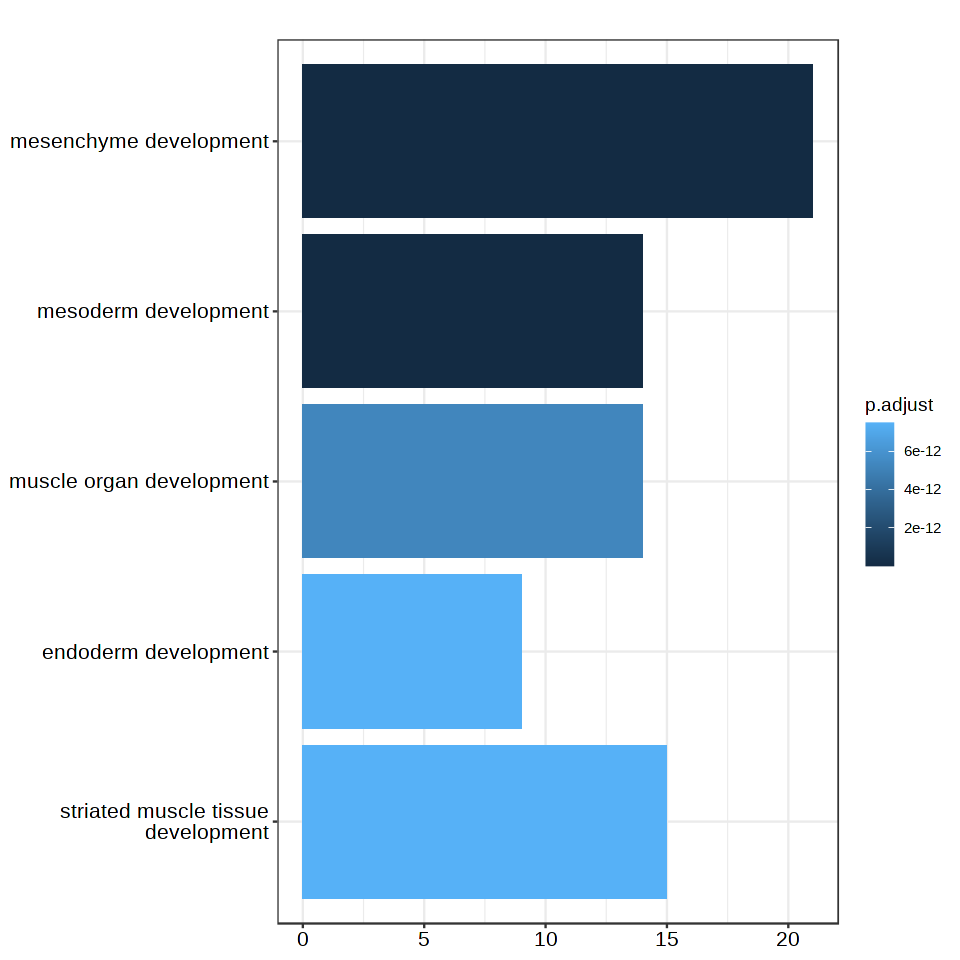

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
barplot(enrich_nd, showCategory=5)  + scale_fill_gradient(low = "#132B43", high = "#56B1F7")

### WT(ND) Day 5 upregulated Transcription factors

In [ ]:
tf <- dat_merge_d5 %>% filter(pvalue_adj < 0.05 & D5 > 0 & padj < 0.05 & log2FoldChange > 0)

In [ ]:
tf <- tf %>% arrange(-log2FoldChange)

In [ ]:
d5_nd_go <- enrichGO(gene = tf$gene_name,
                OrgDb         = org.Mm.eg.db,
                keyType = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = FALSE) #Day 3 over-representation test data for ND

In [ ]:
enrich_nd_d5 <- d5_nd_go%>% filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% filter(!str_detect(Description, 'negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



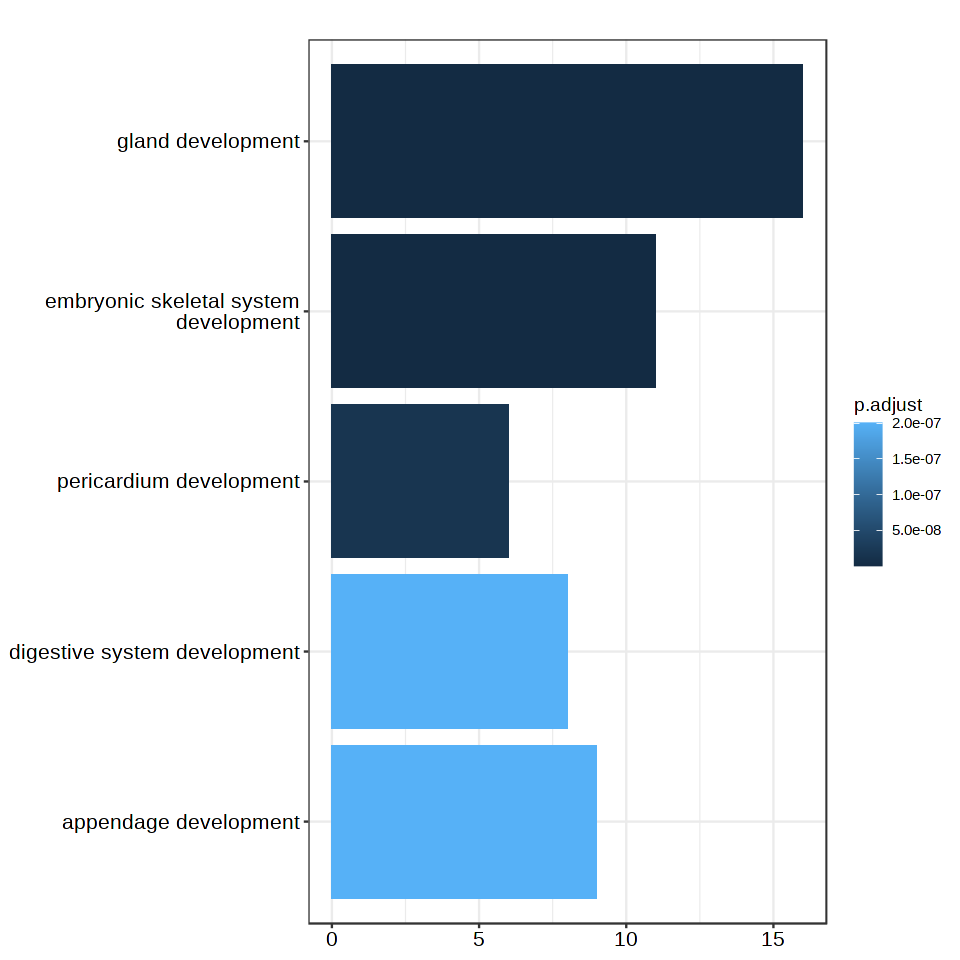

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
barplot(enrich_nd_d5, showCategory=5)  + scale_fill_gradient(low = "#132B43", high = "#56B1F7")

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [2] GenomicFeatures_1.46.5                   
 [3] gageData_2.32.0                          
 [4] gage_2.44.0                              
 [5] pathview_1.34.0                          
 [6] enrich

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [2] GenomicFeatures_1.46.5                   
 [3] gageData_2.32.0                          
 [4] gage_2.44.0                              
 [5] pathview_1.34.0                          
 [6] enrich